#Heart disease

WHO announced that heart diseases is the top one killer over the world. If we can evaluate the probability of a person having heart disease, than we can provide early treatment . This dataset is  real data including important features of patients and you can find it in https://www.kaggle.com/ronitf/heart-disease-uci/code, we'll use it to predict if a person as heart disease or not . This is a classification problem with just two classes zero and one, we'll don't use linear regression this method doesn't work well because classification is not actually a linear function, so we use logistic regression, logistic regression is a method for classifying data into discrete outcomes.

First lets import all the libraries we'll use to create and analyze this model.

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier



Now let's analyse the data

In [18]:
file = pd.read_csv('/home/leandro/Desktop/datast/heart.csv')
features = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal' ]
target = 'target'
X = np.array(file[features])
Y = np.array(file[target])

In [ ]:
#Profiling report
profile = ProfileReport(file, title='HeartDF' )
profile.to_file("your_report.html")

![ProfiingReport](https://user-images.githubusercontent.com/83521233/118054143-21c73a80-b35c-11eb-91c2-44e658cdcd35.png)

We have no missing cells, and 13 features to reach the target (0 no presence or 1 presence)

sex  target
0    0          24
     1          72
1    0         114
     1          93
dtype: int64


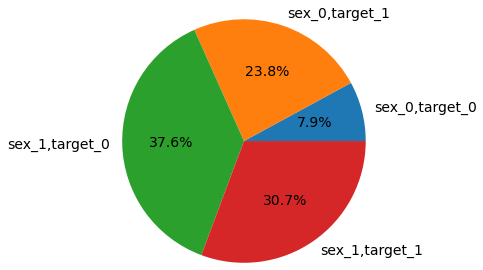

In [11]:
file_sex = file.groupby(["sex","target"]).size()
print(file.groupby(["sex","target"]).size())
plt.pie(file_sex, labels = ["sex_0,target_0", "sex_0,target_1", "sex_1,target_0", "sex_1,target_1"],autopct='%1.1f%%',radius = 1.4, textprops = {"fontsize" : 14})
plt.show()


Here we see the distribution of man and woman that having or not heart disease in this dataset(keeping in mind that we have more male samples).


In [ ]:
Now lets analyse the feature importance.

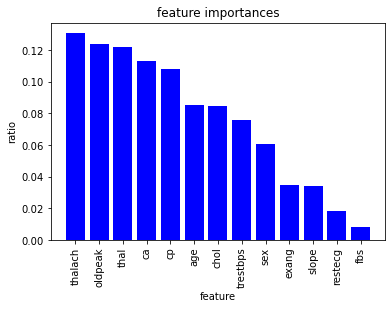

In [15]:
df = pd.read_csv('/home/leandro/Desktop/datast/heart.csv')
features = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target' ]
target = 'target'

df_train, df_test = train_test_split(df)
df_train = df_train[features]
df_test = df_test[features]

df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('target',axis=1), df_train['target']
X_test, y_test = df_test.drop('target',axis=1), df_test['target']


# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_


inducies = np.argsort(importance)[::-1]
feature_dict = dict()

for idx in inducies:
    feature_dict[list(df.drop("target",1).columns)[idx]] = float(importance[idx])

y_pos = np.arange(len(feature_dict.keys()))
plt.bar(y_pos, list(feature_dict.values()), align = "center",color = "blue")
plt.xticks(y_pos, list(feature_dict.keys()), rotation = 90)
plt.xlabel("feature")
plt.ylabel("ratio")
plt.title("feature importances")

plt.show()


Feature importance scores can be used to help interpret the data, but they can also be used directly to help rank and select features that are most useful to a predictive model. Lets use the information we have to select the features to our model.
Lets create a model an train it with all variables

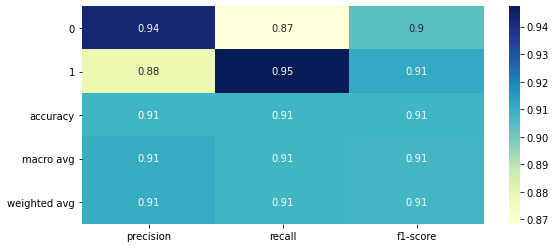

In [23]:
# Train/Test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=5)

#Fit model / predict
lreg = LogisticRegression(max_iter=2000)
lreg.fit(X_train, Y_train)
y_pred = lreg.predict(X_test)


#plot classification report
plt.figure(figsize=(9,4))
clf_report = classification_report(Y_test,y_pred,target_names=[0,1],  output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap="YlGnBu" )
plt.savefig('CLreport.png')
plt.show()






Note: Precision says this,of all the patients where we'vepredicted that are 1, what fraction of them actually are 1? (true positives / predicted positives)
Recall says this all the patients in the data
set that actually are 1, what fraction of them that
we correctly detect as beeing 1? (true positives / actual positives)
Having a high recall and precision would be a good thing.
F1 score conveys the balance between the precision and the recall.


The model is giving us a precision of 88 %  a recall of 85%  and a f1 - score  of 91%;


Now we train the model without the 2 lowest ranked features on feature importance. 

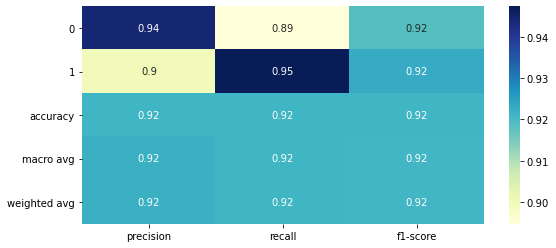

In [24]:
features = ['age','sex','cp','trestbps','chol','thalach','exang','oldpeak','slope','ca','thal' ]
target = 'target'
X = np.array(file[features])
Y = np.array(file[target])

# Train/Test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=5)

#Fit model / predict
lreg = LogisticRegression(max_iter=2000)
lreg.fit(X_train, Y_train)
y_pred = lreg.predict(X_test)


#plot classification report
plt.figure(figsize=(9,4))
clf_report = classification_report(Y_test,y_pred,target_names=[0,1],  output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap="YlGnBu" )
plt.savefig('CLreport.png')
plt.show()

We have a improvement in precision and f1 score.

Plot Confusion Matrix to see how many true and false predictions we made

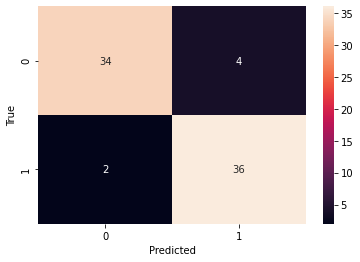

In [25]:
#plot confusion matrix
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


We too will use the ROC Curve 

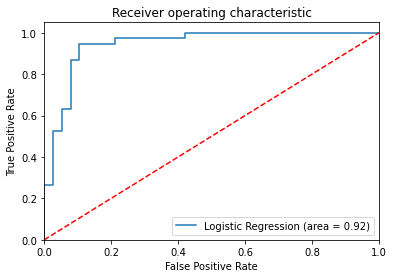

In [26]:
#Plot ROC
logit_roc_auc = roc_auc_score(Y_test, lreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, lreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.
Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives.
The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.
When AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly.

Trading Off Precision and Recall will be left to another model.